# N-gram Language Models - Practice with Real Data

**Course:** Natural Language Processing  
**Topic:** Building N-gram Models with HuggingFace Datasets  

In this notebook, you will:
1. Load real text corpora from HuggingFace
2. Implement n-gram language models from scratch
3. Train and evaluate your models
4. Generate text and compare different approaches

## Setup

In [1]:
# Install required packages
!pip install datasets -q

import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import random
from datasets import load_dataset
from tqdm import tqdm

# Set random seed
np.random.seed(42)
random.seed(42)

print("✓ Setup complete!")

✓ Setup complete!


## Part 1: Load Dataset from HuggingFace

We'll use the **WikiText-2** dataset, which contains good quality text from Wikipedia articles.

In [2]:
# Load WikiText-2 dataset
print("Loading WikiText-2 dataset...")
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

print("\nDataset structure:")
print(dataset)

# Explore the data
print("\nSample from training set:")
print(dataset['train'][0])
print("\n" + "="*60)
print(dataset['train'][1])

Loading WikiText-2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(



Dataset structure:
DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

Sample from training set:
{'text': ''}

{'text': ' = Valkyria Chronicles III = \n'}


### Exercise 1.1: Data Exploration

Answer these questions:
1. How many examples are in train/validation/test splits?
2. What does each example look like?
3. How many empty or very short texts are there?

In [3]:
# Question 1: Count examples in each split
train_size = len(dataset['train'])
valid_size = len(dataset['validation'])
test_size = len(dataset['test'])

print(f"Train size: {train_size}")
print(f"Validation size: {valid_size}")
print(f"Test size: {test_size}")

# Question 2: Look at a few examples
print("\nFirst 5 examples from training set:")
# TODO: YOUR CODE HERE - print first 5 examples
print(dataset['train'][:5])


# Question 3: Check for empty/short texts
print("\nChecking for empty or short texts:")
# TODO: YOUR CODE HERE - count texts with length 0 or < 5 words
# Hint: Use len(text['text'].split())
empty_count = sum(1 for text in dataset['train'] if len(text['text'].split()) == 0)
short_count = sum(1 for text in dataset['train'] if len(text['text'].split()) < 5)
print(f"Number of empty texts: {empty_count}")
print(f"Number of short texts (<5 words): {short_count}")

Train size: 36718
Validation size: 3760
Test size: 4358

First 5 examples from training set:
{'text': ['', ' = Valkyria Chronicles III = \n', '', ' Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n', " The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standar

## Part 2: Data Preprocessing

### Exercise 2.1: Implement Text Preprocessing

In [4]:
def preprocess_text(text: str, add_start_end: bool = True) -> List[str]:
    """
    Preprocess text:
    - Convert to lowercase
    - Split into tokens (simple whitespace tokenization)
    - Add <s> and </s> tokens if requested

    Args:
        text: Input text
        add_start_end: Whether to add start/end tokens

    Returns:
        List of tokens
    """
    # TODO: Implement this function
    # Step 1: Convert to lowercase
    text= text.lower()

    # Step 2: Split on whitespace
    tokens = text.split()

    # Step 3: Add <s> and </s> if requested
    if add_start_end:
        tokens = ['<s>'] + tokens + ['</s>']
        return tokens

    pass


# Test your function
test_text = "Hello World! This is a test."
tokens = preprocess_text(test_text, add_start_end=True)
print(f"Input: {test_text}")
print(f"Expected: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']")
print(f"Your output: {tokens}")

Input: Hello World! This is a test.
Expected: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']
Your output: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']


### Exercise 2.2: Prepare Training Corpus

In [5]:
def prepare_corpus(dataset_split, max_examples: int = None) -> List[List[str]]:
    """
    Prepare corpus from dataset split.

    Args:
        dataset_split: HuggingFace dataset split
        max_examples: Maximum number of examples to use (None = all)

    Returns:
        List of tokenized sentences
    """
    corpus = []

    # TODO: Implement this function
    # 1. Iterate through the dataset
    # 2. Skip empty texts (text['text'].strip() == '')
    # 3. Preprocess each text using your function above
    # 4. Add to corpus only if result has more than 2 tokens
    # 5. Stop at max_examples if specified

    # Hint: Use this structure:
    # count = 0
    # for item in tqdm(dataset_split, desc="Processing"):
    #     text = item['text'].strip()
    #     if not text:
    #         continue
    #     ...
    count = 0
    for item in tqdm(dataset_split, desc="Processing"):
        text = item['text'].strip()
        if not text:
            continue
        tokens = preprocess_text(text, add_start_end=True)
        if len(tokens) > 2:
            corpus.append(tokens)
            count += 1
        if max_examples and count >= max_examples:
            break
    return corpus

    pass

# Prepare training corpus (use subset for speed)
print("Preparing training corpus...")
train_corpus = prepare_corpus(dataset['train'], max_examples=1000)

print(f"\nCorpus size: {len(train_corpus)} sentences")
print(f"First sentence: {train_corpus[0][:10]}...")  # Show first 10 tokens

Preparing training corpus...


Processing:   4%|▍         | 1538/36718 [00:00<00:01, 25485.81it/s]


Corpus size: 1000 sentences
First sentence: ['<s>', '=', 'valkyria', 'chronicles', 'iii', '=', '</s>']...


## Part 3: Build Vocabulary

### Exercise 3.1: Build Vocabulary

In [6]:
def build_vocabulary(corpus: List[List[str]]) -> set:
    """
    Build vocabulary from corpus.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Set of unique tokens
    """
    # TODO: Implement this function
    # Hint: Create a set and add all tokens from all sentences
    vocab = set()
    for sentence in corpus:
        for token in sentence:
            vocab.add(token)
    return vocab

    pass

# Build vocabulary
vocab = build_vocabulary(train_corpus)
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {list(vocab)[:20]}")

Vocabulary size: 10690
Sample words: ['e.p.', 'interwoven', 'serapis', 'fencing', 'beverly', 'feature', 'distributor', 'gauze', 'caused', 'fast', 'identities', 'linear', 'situations', 'farman', 'exceed', 'm.', 'supper', 'porfiriato', 'clients', 'min']


## Part 4: Implement N-gram Counting

### Exercise 4.1: Count Unigrams

In [7]:
def count_unigrams(corpus: List[List[str]]) -> Counter:
    """
    Count unigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with unigram counts
    """
    unigram_counts = Counter()

    # TODO: Implement this function
    # Iterate through corpus and count each token
    for sentence in corpus:
        for token in sentence:
            unigram_counts[token] += 1
    return unigram_counts

    pass

# Test
unigram_counts = count_unigrams(train_corpus)
print(f"Total unigrams: {sum(unigram_counts.values())}")
print(f"Unique unigrams: {len(unigram_counts)}")
print(f"\nMost common unigrams:")
print(unigram_counts.most_common(20))

Total unigrams: 90023
Unique unigrams: 10690

Most common unigrams:
[('the', 5757), (',', 4468), ('.', 3203), ('of', 2568), ('and', 2237), ('in', 1927), ('to', 1655), ('a', 1574), ('=', 1191), ('<s>', 1000), ('</s>', 1000), ('"', 961), ('was', 865), ('@-@', 782), ('with', 697), ('as', 663), ('for', 662), ('that', 623), ("'s", 606), ('on', 594)]


### Exercise 4.2: Count Bigrams

In [8]:
def count_bigrams(corpus: List[List[str]]) -> Counter:
    """
    Count bigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with bigram counts (bigrams as tuples)
    """
    bigram_counts = Counter()

    # TODO: Implement this function
    # For each sentence, create pairs of consecutive words
    # Store as tuples: (word1, word2)
    for sentence in corpus:
        for i in range(len(sentence) - 1):
            bigram = (sentence[i], sentence[i + 1])
            bigram_counts[bigram] += 1
    return bigram_counts

    pass

# Test
bigram_counts = count_bigrams(train_corpus)
print(f"Total bigrams: {sum(bigram_counts.values())}")
print(f"Unique bigrams: {len(bigram_counts)}")
print(f"\nMost common bigrams:")
print(bigram_counts.most_common(20))

Total bigrams: 89023
Unique bigrams: 50573

Most common bigrams:
[(('of', 'the'), 837), (('=', '='), 656), ((',', 'and'), 607), (('.', '</s>'), 578), (('.', 'the'), 526), (('in', 'the'), 498), ((',', 'the'), 316), (('to', 'the'), 268), (('<s>', '='), 264), (('=', '</s>'), 264), (('on', 'the'), 199), (('<s>', 'the'), 181), (('for', 'the'), 178), (('and', 'the'), 177), (('with', 'the'), 170), (('at', 'the'), 157), (('.', 'in'), 156), (('.', '"'), 130), ((',', 'a'), 127), ((',', 'which'), 124)]


### Exercise 4.3: Count Trigrams

In [9]:
def count_trigrams(corpus: List[List[str]]) -> Counter:
    """
    Count trigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with trigram counts (trigrams as tuples)
    """
    trigram_counts = Counter()

    # TODO: Implement this function
    # For each sentence, create triples of consecutive words
    # Store as tuples: (word1, word2, word3)
    for sentence in corpus:
        for i in range(len(sentence) - 2):
            trigram = (sentence[i], sentence[i + 1], sentence[i + 2])
            trigram_counts[trigram] += 1
    return trigram_counts

    pass

# Test
trigram_counts = count_trigrams(train_corpus)
print(f"Total trigrams: {sum(trigram_counts.values())}")
print(f"Unique trigrams: {len(trigram_counts)}")
print(f"\nMost common trigrams:")
print(trigram_counts.most_common(20))

Total trigrams: 88023
Unique trigrams: 76398

Most common trigrams:
[(('<s>', '=', '='), 230), (('=', '=', '</s>'), 230), (('=', '=', '='), 196), ((',', 'and', 'the'), 65), (('the', 'blue', 'jackets'), 39), (('one', 'of', 'the'), 37), (('.', '"', '</s>'), 34), ((';', 'blackie', ','), 30), (('as', 'well', 'as'), 29), (('"', '.', '</s>'), 27), ((',', 'such', 'as'), 27), (('the', 'gold', 'dollar'), 27), (('strapping', 'young', 'lad'), 26), (('the', 'united', 'states'), 25), (('.', 'she', 'was'), 24), (('.', 'it', 'was'), 22), ((',', 'and', 'a'), 22), (('.', 'in', 'the'), 22), (('south', 'of', 'heaven'), 22), (('in', 'the', 'uk'), 21)]


## Part 5: Implement Language Models

### Exercise 5.1: Unigram Model

In [10]:
class UnigramModel:
    """Unigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.total_words = sum(self.unigram_counts.values())

    def probability(self, word: str) -> float:
        """Calculate P(word)."""
        # TODO: Implement this
        # P(word) = C(word) / N
        prob = self.unigram_counts[word] / self.total_words if self.total_words > 0 else 0.0
        return prob
        pass

    def log_probability(self, word: str) -> float:
        """Calculate log P(word)."""
        # TODO: Implement this
        # Handle zero probability by returning float('-inf')
        prob = self.probability(word)
        if prob > 0:
            return np.log(prob)
        else:
            return float('-inf')
        pass

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        # Sum of log probabilities of all words
        sum_log_prob = 0.0
        for word in sentence:
            sum_log_prob += self.log_probability(word)
        return sum_log_prob
        pass

# Test your model
unigram_model = UnigramModel(train_corpus)
test_words = ["the", "of", "and", "<s>", "</s>"]
print("Unigram Probabilities:")
for word in test_words:
    prob = unigram_model.probability(word)
    print(f"  P({word}) = {prob:.6f}")

Unigram Probabilities:
  P(the) = 0.063950
  P(of) = 0.028526
  P(and) = 0.024849
  P(<s>) = 0.011108
  P(</s>) = 0.011108


### Exercise 5.2: Bigram Model

In [11]:
class BigramModel:
    """Bigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word)."""
        # TODO: Implement this
        # P(wi | wi-1) = C(wi-1, wi) / C(wi-1)
        prob=self.bigram_counts[(previous_word, word)] / self.unigram_counts[previous_word] if self.unigram_counts[previous_word] > 0 else 0.0
        return prob
        pass

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        # TODO: Implement this
        prob = self.probability(word, previous_word)
        if prob > 0:
            return np.log(prob)
        else:
            return float('-inf')
        pass

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        # Sum log probabilities: log P(w2|w1) + log P(w3|w2) + ...
        sum_log_prob = 0.0
        for i in range(1, len(sentence)):
            prev_word = sentence[i - 1]
            word = sentence[i]
            sum_log_prob += self.log_probability(word, prev_word)
        return sum_log_prob
        pass

# Test your model
bigram_model = BigramModel(train_corpus)
test_bigrams = [("<s>", "the"), ("the", "and"), ("of", "the")]
print("Bigram Probabilities:")
for w1, w2 in test_bigrams:
    prob = bigram_model.probability(w2, w1)
    print(f"  P({w2} | {w1}) = {prob:.6f}")

Bigram Probabilities:
  P(the | <s>) = 0.181000
  P(and | the) = 0.000000
  P(the | of) = 0.325935


### Exercise 5.3: Trigram Model

In [12]:
class TrigramModel:
    """Trigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.bigram_counts = count_bigrams(corpus)
        self.trigram_counts = count_trigrams(corpus)

    def probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate P(word | prev_word2, prev_word1)."""
        # TODO: Implement this
        # P(wi | wi-2, wi-1) = C(wi-2, wi-1, wi) / C(wi-2, wi-1)
        prob=self.trigram_counts[(prev_word2, prev_word1, word)] / self.bigram_counts[(prev_word2, prev_word1)] if self.bigram_counts[(prev_word2, prev_word1)] > 0 else 0.0
        return prob
        pass

    def log_probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate log P(word | prev_word2, prev_word1)."""
        # TODO: Implement this
        prob = self.probability(word, prev_word1, prev_word2)
        if prob > 0:
            return np.log(prob)
        else:
            return float('-inf')
        pass

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        # Sum log probabilities: log P(w3|w1,w2) + log P(w4|w2,w3) + ...
        sum_log_prob = 0.0
        for i in range(2, len(sentence)):
            prev_word2 = sentence[i - 2]
            prev_word1 = sentence[i - 1]
            word = sentence[i]
            sum_log_prob += self.log_probability(word, prev_word1, prev_word2)
        return sum_log_prob
        pass

# Test your model
trigram_model = TrigramModel(train_corpus)
if len(train_corpus[0]) >= 3:
    w1, w2, w3 = train_corpus[0][:3]
    prob = trigram_model.probability(w3, w2, w1)
    print(f"P({w3} | {w1}, {w2}) = {prob:.6f}")

P(valkyria | <s>, =) = 0.003788


## Part 6: Model Evaluation - Perplexity

### Exercise 6.1: Implement Perplexity Calculation

In [13]:
def calculate_perplexity(model, test_corpus: List[List[str]], model_type: str = "bigram") -> float:
    """
    Calculate perplexity for a language model.

    Perplexity = exp(-1/N * sum(log P(wi | context)))

    Args:
        model: Language model with sentence_log_probability method
        test_corpus: List of test sentences
        model_type: 'unigram', 'bigram', or 'trigram'

    Returns:
        Perplexity score
    """
    # TODO: Implement this function
    # 1. Calculate total log probability across all sentences
    # 2. Count total words (excluding <s> for unigram, and context tokens)
    # 3. Calculate average log probability
    # 4. Return exp(-avg_log_prob)
    sum_log_prob = 0.0
    total_words = 0 
    
    for sentence in test_corpus:
        log_prob = model.sentence_log_probability(sentence)
        sum_log_prob += log_prob
        
        if model_type == "unigram":
            # For unigram, count all tokens including <s> and </s>
            total_words += len(sentence)
        elif model_type == "bigram":
            # For bigram, we count pairs starting from position 1
            # P(w1|w0) + P(w2|w1) + ... so we have len-1 predictions
            total_words += len(sentence) - 1  
        elif model_type == "trigram":
            # For trigram, we count triples starting from position 2
            # P(w2|w0,w1) + P(w3|w1,w2) + ... so we have len-2 predictions
            total_words += len(sentence) - 2
    
    if total_words == 0:
        return float('inf')
    
    # Average log probability (this will be negative)
    avg_log_prob = sum_log_prob / total_words
    
    # Perplexity = exp(-avg_log_prob) = exp(|avg_log_prob|) since avg_log_prob is negative
    perplexity = np.exp(-avg_log_prob)
    
    return perplexity

# Prepare test corpus
print("Preparing test corpus...")
test_corpus = prepare_corpus(dataset['validation'], max_examples=100)
print(f"Test corpus size: {len(test_corpus)} sentences")

# Calculate perplexities
print("\nCalculating perplexities...")
# TODO: Calculate and print perplexities for all three models
print(f"Unigram Model Perplexity: {calculate_perplexity(unigram_model, test_corpus, model_type='unigram'):.2f}")
print(f"Bigram Model Perplexity: {calculate_perplexity(bigram_model, test_corpus, model_type='bigram'):.2f}")
print(f"Trigram Model Perplexity: {calculate_perplexity(trigram_model, test_corpus, model_type='trigram'):.2f}")

Preparing test corpus...


Processing:   4%|▍         | 156/3760 [00:00<00:00, 18863.85it/s]

Test corpus size: 100 sentences

Calculating perplexities...
Unigram Model Perplexity: inf
Bigram Model Perplexity: inf
Trigram Model Perplexity: inf


## Part 7: Text Generation

### Exercise 7.1: Implement Text Generator

In [14]:
class BigramGenerator:
    """Generate text using bigram model."""

    def __init__(self, corpus: List[List[str]]):
        self.bigram_model = BigramModel(corpus)
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.next_word_probs = self._build_next_word_distribution()

    def _build_next_word_distribution(self) -> Dict:
        """Build distribution over next words for each word."""
        # TODO: Implement this
        # For each word w1, build dict of {w2: P(w2|w1)}
        self.next_word_probs = {}
        for word1 in self.unigram_counts:
            total_count = self.unigram_counts[word1]
            next_words = {}
            for word2 in self.unigram_counts:
                bigram = (word1, word2)
                count = self.bigram_counts[bigram]
                if total_count > 0:
                    next_words[word2] = count / total_count
            self.next_word_probs[word1] = next_words
        return self.next_word_probs

    def generate(self, max_length: int = 20) -> List[str]:
        """Generate a sentence."""
        # TODO: Implement this
        # 1. Start with '<s>'
        # 2. Sample next word based on probabilities
        # 3. Stop at '</s>' or max_length
        # Hint: Use np.random.choice(words, p=probs)
        sentence = ['<s>']
        
        for _ in range(max_length - 1):
            current_word = sentence[-1]
            
            # Get next word probabilities
            if current_word not in self.next_word_probs:
                break
            
            next_word_dict = self.next_word_probs[current_word]
            if not next_word_dict:
                break
            
            # Prepare words and probabilities
            words = list(next_word_dict.keys())
            probs = np.array(list(next_word_dict.values()))
            
            # Normalize probabilities
            probs = probs / np.sum(probs)
            
            # Sample next word
            next_word = np.random.choice(words, p=probs)
            sentence.append(next_word)
            
            # Stop if end token
            if next_word == '</s>':
                break
        
        return sentence

# Test generator
generator = BigramGenerator(train_corpus)
print("Generated Sentences:")
print("=" * 60)
for i in range(10):
    sentence = generator.generate(max_length=20)
    print(f"{i+1}. {' '.join(sentence)}")

Generated Sentences:
1. <s> the provincial governor henry massey rector and fuel oil painting , townsend band , and " and captured and
2. <s> the political and directly with them temporary boosts on this is interpreted by the auspices of disorder . </s>
3. <s> following year , or the hacendados ) at the stings . the hindu epic mahabharata , originally hathor ,
4. <s> = = = = = ancient egyptian religious man , scotland , carved panel . </s>
5. <s> simon on march 1915 , while the genera aleuria , the arsenal to acting style series of the allied
6. <s> near threatened with up and unofficial fan translation to leave the eyes common of individual performance , to be
7. <s> = critical transportation systems 1 – 1 % from 157 hours from the engine broke out that : azure
4. <s> = = = = = ancient egyptian religious man , scotland , carved panel . </s>
5. <s> simon on march 1915 , while the genera aleuria , the arsenal to acting style series of the allied
6. <s> near threatened with up and unoffi

## Part 8: Smoothing

### Exercise 8.1: Implement Add-One Smoothing

In [15]:
class BigramModelSmoothed:
    """Bigram model with add-one smoothing."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.vocab = build_vocabulary(corpus)
        self.vocab_size = len(self.vocab)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word) with add-one smoothing.

        Formula: P(wi | wi-1) = (C(wi-1, wi) + 1) / (C(wi-1) + V)
        """
        # TODO: Implement this
        bigram = (previous_word, word)
        count = self.bigram_counts[bigram]
        prev_count = self.unigram_counts[previous_word]
        
        if prev_count > 0:
            prob = (count + 1) / (prev_count + self.vocab_size)
        else:
            prob = 1.0 / self.vocab_size
        
        return prob

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        # TODO: Implement this
        prob = self.probability(word, previous_word)
        if prob > 0:
            return np.log(prob)
        else:
            return float('-inf')

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        sum_log_prob = 0.0
        for i in range(1, len(sentence)):
            prev_word = sentence[i - 1]
            word = sentence[i]
            sum_log_prob += self.log_probability(word, prev_word)
        return sum_log_prob

# Compare with unsmoothed model
smoothed_model = BigramModelSmoothed(train_corpus)

# Test on unseen bigrams
test_unseen = [("<s>", "quantum"), ("the", "xylophone"), ("amazing", "unicorn")]
print("Comparison: Unsmoothed vs Smoothed")
print("=" * 60)
for w1, w2 in test_unseen:
    unsmoothed = bigram_model.probability(w2, w1)
    smoothed = smoothed_model.probability(w2, w1)
    print(f"P({w2} | {w1}):")
    print(f"  Unsmoothed: {unsmoothed:.8f}")
    print(f"  Smoothed:   {smoothed:.8f}")
    print()

Comparison: Unsmoothed vs Smoothed
P(quantum | <s>):
  Unsmoothed: 0.00000000
  Smoothed:   0.00008554

P(xylophone | the):
  Unsmoothed: 0.00000000
  Smoothed:   0.00006080

P(unicorn | amazing):
  Unsmoothed: 0.00000000
  Smoothed:   0.00009353



## Part 9: Analysis and Comparison

### Exercise 9.1: Compare All Models

In [16]:
# TODO: Create a comparison table showing:
# 1. Number of parameters (unique n-grams)
# 2. Training perplexity
# 3. Test perplexity
# 4. Sample generated sentences

import pandas as pd

# Calculate training perplexities
train_perplexity_unigram = calculate_perplexity(unigram_model, train_corpus, model_type='unigram')
train_perplexity_bigram = calculate_perplexity(bigram_model, train_corpus, model_type='bigram')
train_perplexity_trigram = calculate_perplexity(trigram_model, train_corpus, model_type='trigram')
train_perplexity_smoothed = calculate_perplexity(smoothed_model, train_corpus, model_type='bigram')

# Calculate test perplexities
test_perplexity_unigram = calculate_perplexity(unigram_model, test_corpus, model_type='unigram')
test_perplexity_bigram = calculate_perplexity(bigram_model, test_corpus, model_type='bigram')
test_perplexity_trigram = calculate_perplexity(trigram_model, test_corpus, model_type='trigram')
test_perplexity_smoothed = calculate_perplexity(smoothed_model, test_corpus, model_type='bigram')

comparison_data = {
    'Model': ['Unigram', 'Bigram', 'Trigram', 'Bigram (Smoothed)'],
    'Parameters': [
        len(unigram_counts),
        len(bigram_counts),
        len(trigram_counts),
        len(bigram_counts)
    ],
    'Train Perplexity': [
        train_perplexity_unigram,
        train_perplexity_bigram,
        train_perplexity_trigram,
        train_perplexity_smoothed
    ],
    'Test Perplexity': [
        test_perplexity_unigram,
        test_perplexity_bigram,
        test_perplexity_trigram,
        test_perplexity_smoothed
    ]
}

df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(df.to_string(index=False))


Model Comparison:
            Model  Parameters  Train Perplexity  Test Perplexity
          Unigram       10690        855.963102              inf
           Bigram       50573         27.770742              inf
          Trigram       76398          2.681875              inf
Bigram (Smoothed)       50573       2087.369332      3772.919291


### Exercise 9.2: Visualize Results

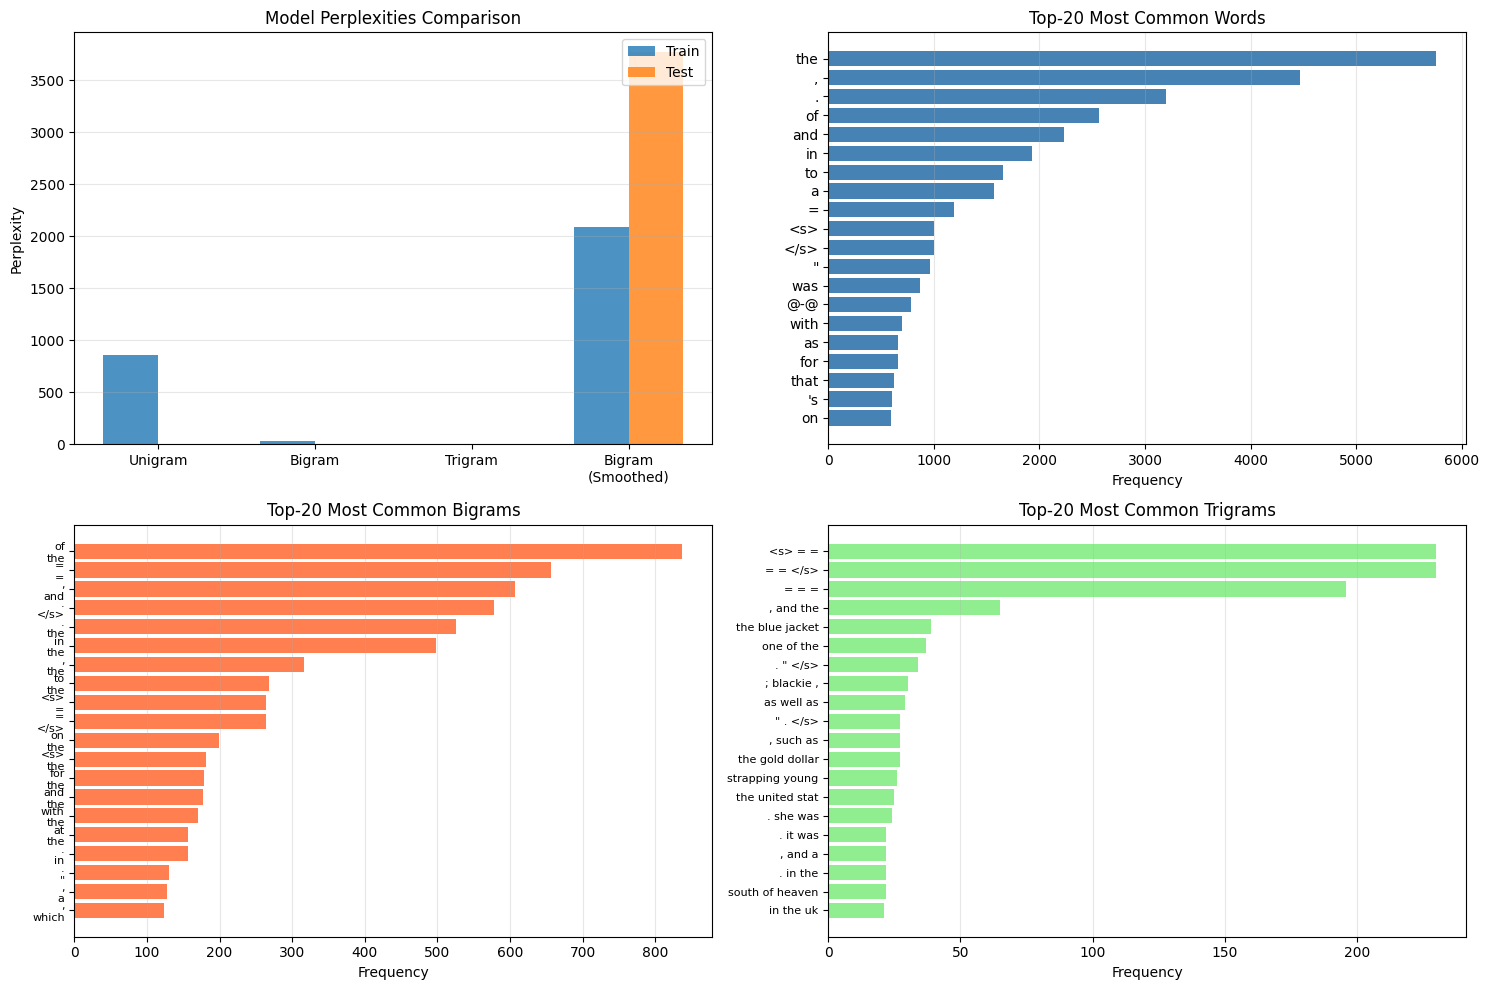

In [17]:
# TODO: Create visualizations:
# 1. Bar chart of perplexities
# 2. Top-20 most common words
# 3. Top-20 most common bigrams

import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Perplexities comparison
models = ['Unigram', 'Bigram', 'Trigram', 'Bigram\n(Smoothed)']
train_perps = [train_perplexity_unigram, train_perplexity_bigram, 
               train_perplexity_trigram, train_perplexity_smoothed]
test_perps = [test_perplexity_unigram, test_perplexity_bigram, 
              test_perplexity_trigram, test_perplexity_smoothed]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_perps, width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, test_perps, width, label='Test', alpha=0.8)
axes[0, 0].set_ylabel('Perplexity')
axes[0, 0].set_title('Model Perplexities Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Top-20 most common words
top_words = unigram_counts.most_common(20)
words, counts = zip(*top_words)
axes[0, 1].barh(range(len(words)), counts, color='steelblue')
axes[0, 1].set_yticks(range(len(words)))
axes[0, 1].set_yticklabels(words)
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_title('Top-20 Most Common Words')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Top-20 most common bigrams
top_bigrams = bigram_counts.most_common(20)
bigrams, counts = zip(*top_bigrams)
bigram_labels = [f"{b[0]}\n{b[1]}" for b in bigrams]
axes[1, 0].barh(range(len(bigrams)), counts, color='coral')
axes[1, 0].set_yticks(range(len(bigrams)))
axes[1, 0].set_yticklabels(bigram_labels, fontsize=8)
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_title('Top-20 Most Common Bigrams')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Top-20 most common trigrams
top_trigrams = trigram_counts.most_common(20)
trigrams, counts = zip(*top_trigrams)
trigram_labels = [f"{t[0]} {t[1]} {t[2]}"[:15] for t in trigrams]
axes[1, 1].barh(range(len(trigrams)), counts, color='lightgreen')
axes[1, 1].set_yticks(range(len(trigrams)))
axes[1, 1].set_yticklabels(trigram_labels, fontsize=8)
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_title('Top-20 Most Common Trigrams')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Part 10: Bonus Challenges

### Challenge 1: Try Different Datasets

Load a different dataset from HuggingFace and train your models on it.

Suggestions:
- `"wikitext"` (different versions)
- `"bookcorpus"`
- `"ptb_text_only"` (Penn Treebank)
- `"imdb"` (movie reviews)

In [ ]:


# Note: The 'text' loader puts the content in a column named 'text', 
# which matches the format of your previous WikiText dataset.

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [34]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 42068
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3370
    })
    test: Dataset({
        features: ['text'],
        num_rows: 3761
    })
})

In [35]:
# TODO: YOUR CODE HERE
# Try loading and training on a different dataset
# This bypasses the broken Hugging Face script
from datasets import load_dataset
ptb_urls = {
    'train': 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/ptb.train.txt',
    'validation': 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/ptb.valid.txt',
    'test': 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/ptb.test.txt'
}
# Example: Using Penn Treebank dataset
print("Loading Penn Treebank dataset...")
try:
    
    

# Load Penn Treebank directly from the raw text files hosted on GitHub


    ptb_dataset = load_dataset('text', data_files=ptb_urls)
    print("\nPTB Dataset structure:")
    print(ptb_dataset)
    
    # Prepare corpus from PTB
    print("\nPreparing PTB training corpus...")
    ptb_train_corpus = prepare_corpus(ptb_dataset['train'], max_examples=500)
    print(f"PTB Corpus size: {len(ptb_train_corpus)} sentences")
    
    # Build models
    print("Training models on PTB...")
    ptb_unigram = UnigramModel(ptb_train_corpus)
    ptb_bigram = BigramModel(ptb_train_corpus)
    ptb_trigram = TrigramModel(ptb_train_corpus)
    
    # Compare perplexities
    ptb_test_corpus = prepare_corpus(ptb_dataset['validation'], max_examples=100)
    print(f"\nPTB Test corpus size: {len(ptb_test_corpus)}")
    
    print("\nPTB Model Perplexities:")
    print(f"  Unigram: {calculate_perplexity(ptb_unigram, ptb_test_corpus, 'unigram'):.2f}")
    print(f"  Bigram:  {calculate_perplexity(ptb_bigram, ptb_test_corpus, 'bigram'):.2f}")
    print(f"  Trigram: {calculate_perplexity(ptb_trigram, ptb_test_corpus, 'trigram'):.2f}")
    
except Exception as e:
    print(f"Error loading PTB dataset: {e}")
    print("You can try other datasets like 'bookcorpus' or 'wikitext'")

Loading Penn Treebank dataset...

PTB Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 42068
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3370
    })
    test: Dataset({
        features: ['text'],
        num_rows: 3761
    })
})

Preparing PTB training corpus...

PTB Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 42068
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3370
    })
    test: Dataset({
        features: ['text'],
        num_rows: 3761
    })
})

Preparing PTB training corpus...


Processing:   1%|          | 499/42068 [00:00<00:01, 21425.58it/s]



PTB Corpus size: 500 sentences
Training models on PTB...


Processing:   3%|▎         | 99/3370 [00:00<00:00, 15227.96it/s]


PTB Test corpus size: 100

PTB Model Perplexities:
  Unigram: inf
  Bigram:  inf
  Trigram: inf


### Challenge 2: Implement Better Smoothing

Implement add-k smoothing (where k < 1) or interpolation smoothing.

In [36]:
# TODO: YOUR CODE HERE
# Implement add-k smoothing (where k < 1) or interpolation smoothing

class BigramModelAddKSmoothing:
    """Bigram model with add-k smoothing."""

    def __init__(self, corpus: List[List[str]], k: float = 0.5):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.vocab = build_vocabulary(corpus)
        self.vocab_size = len(self.vocab)
        self.k = k  # Smoothing parameter, typically < 1

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word) with add-k smoothing.

        Formula: P(wi | wi-1) = (C(wi-1, wi) + k) / (C(wi-1) + k*V)
        """
        bigram = (previous_word, word)
        count = self.bigram_counts[bigram]
        prev_count = self.unigram_counts[previous_word]
        
        if prev_count > 0:
            prob = (count + self.k) / (prev_count + self.k * self.vocab_size)
        else:
            prob = self.k / (self.k * self.vocab_size)
        
        return prob

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        prob = self.probability(word, previous_word)
        if prob > 0:
            return np.log(prob)
        else:
            return float('-inf')

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        sum_log_prob = 0.0
        for i in range(1, len(sentence)):
            prev_word = sentence[i - 1]
            word = sentence[i]
            sum_log_prob += self.log_probability(word, prev_word)
        return sum_log_prob


# Compare different k values
k_values = [0.1, 0.5, 1.0]
print("Comparison of Add-K Smoothing with Different K Values")
print("=" * 70)

for k in k_values:
    addK_model = BigramModelAddKSmoothing(train_corpus, k=k)
    test_perp = calculate_perplexity(addK_model, test_corpus, model_type='bigram')
    train_perp = calculate_perplexity(addK_model, train_corpus, model_type='bigram')
    
    print(f"K = {k}:")
    print(f"  Train Perplexity: {train_perp:.2f}")
    print(f"  Test Perplexity:  {test_perp:.2f}")
    print()

Comparison of Add-K Smoothing with Different K Values
K = 0.1:
  Train Perplexity: 435.81
  Test Perplexity:  2227.32

K = 0.1:
  Train Perplexity: 435.81
  Test Perplexity:  2227.32

K = 0.5:
  Train Perplexity: 1331.15
  Test Perplexity:  3133.60

K = 0.5:
  Train Perplexity: 1331.15
  Test Perplexity:  3133.60

K = 1.0:
  Train Perplexity: 2087.37
  Test Perplexity:  3772.92

K = 1.0:
  Train Perplexity: 2087.37
  Test Perplexity:  3772.92



### Challenge 3: Build a Simple Autocomplete System

Given a partial sentence, suggest the top-k most likely next words.

In [37]:
def autocomplete(partial_sentence: str, model: BigramModel, k: int = 5) -> List[Tuple[str, float]]:
    """
    Suggest next words for autocomplete.

    Args:
        partial_sentence: Incomplete sentence
        model: Trained bigram model
        k: Number of suggestions

    Returns:
        List of (word, probability) tuples
    """
    # TODO: Implement this
    # Preprocess the partial sentence
    tokens = preprocess_text(partial_sentence, add_start_end=False)
    
    if not tokens:
        return []
    
    # Get the last word
    last_word = tokens[-1]
    
    # Get probabilities for all words after the last word
    suggestions = []
    for word in model.unigram_counts:
        prob = model.probability(word, last_word)
        if prob > 0:
            suggestions.append((word, prob))
    
    # Sort by probability and return top k
    suggestions.sort(key=lambda x: x[1], reverse=True)
    return suggestions[:k]

# Test
test_partial = "the cat sat on the"
suggestions = autocomplete(test_partial, bigram_model, k=5)
print(f"Suggestions for: '{test_partial}'")
for i, (word, prob) in enumerate(suggestions, 1):
    print(f"  {i}. {word}: {prob:.4f}")

# Try more examples
print("\nMore Autocomplete Examples:")
print("=" * 60)
test_partials = [
    "the",
    "in",
    "and",
    "was"
]

for partial in test_partials:
    suggestions = autocomplete(partial, bigram_model, k=5)
    print(f"\nAfter '{partial}':")
    for word, prob in suggestions:
        print(f"  {word}: {prob:.4f}")

Suggestions for: 'the cat sat on the'

More Autocomplete Examples:

After 'the':

After 'in':

After 'and':

After 'was':
